# Scikit Learn Workflow with Pandas

This is the first in a series of notebooks which demonstrate proper Machine Learning workflow using Scikit Learn and Pandas.

### Common Theme in Notebooks
These notebooks focus on the Pandas and Scikit Learn ** workflow **.  * As a beginniner, it is more important to understand proper workflow than it is to write one-off code which optimizes the predictive accuracy of one dataset. *

These notebooks use the titanic dataset from Kaggle, but emphasize * repeatable process * over predictive accuracy.

Once the proper workflow is understood, it then becomes worthwhile to optimize predictive accuracy on a dataset by dataset basis.

Some useful resources for getting starting with Pandas and Scikit Learn include:

1. Udemy
2. O'Reilly
3. Datacamp

### Example Problem
Make a prediction for survived / not-survived using the titanic dataset from Kaggle.  This is a supervised learning problem that will make use of labeled data only.

### Who These Notebokes are For
Anyone who have written some code in Python using Pandas and Scikit Learn.  Someone who knows how to learn an API from documentiong, but is looking for the big picture as to how to put all this together.

### Notebooks
1. Scikit Learn and Pandas Basic Workflow
2. Scikit Learn Pipelines
3. Scikit Learn Pipelines with Pandas Feature Engineering
4. Scikit Learn Pipelines with Pandas Feature Engineering and Hyperparamter Optimization

### Software Versions
This notebook was created in a development enviroment using the Anaconda distribution.  The following versions of of software were used:

* Python  3.6
* Numpy  1.13
* Pandas 0.22
* Scikit Learn 19.1

## Acquire the Data

Download "test.csv" from: https://www.kaggle.com/c/titanic/data 

If this github repo is cloned, "test.csv" will be in the data subdirectory.

### Common Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
sns.set() # enable seaborn style

### Read data into Pandas DataFrame and Examine First Records

In [2]:
train = pd.read_csv('./data/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Exploratory Data Analysis

In [3]:
# Find the percentage of missing values for each column
nrows, ncols = train.shape
train.isnull().sum() / nrows

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
# Let's discared Cabin as there are too many missing values
train.drop('Cabin', axis=1, inplace=True)

In [5]:
# As this notebook is focusing on process not predicitve accuracy,
# let's avoid feature engineering for the Name and Ticket fields.
train.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [6]:
# Examine the datatypes of each remaining column
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [7]:
# In most cases, 'object' represents a string in Pandas
# Let's check the value_counts for Sex and Embarked
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Clearly Sex and Embarked are categorical datatypes.  Let's correct the datatype.
train['Sex'] = train['Sex'].astype('category')
train['Embarked'] = train['Embarked'].astype('category')
train.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Embarked       category
dtype: object

In [10]:
# PassengerId is a unquie id and therefore cannot contribute information towards predicting survival
train.drop("PassengerId", axis=1, inplace=True)

In [11]:
# Pclass is represented as an integer, but integers have an ordering and a well defined distance
# For example, 3-2 = 2-1
# However for Pclass we cannot say that 3rd class - 2nd class = 2nd class - 1st class
# Pclass is better represented as a category, not an integer
train['Pclass'] = train['Pclass'].astype('category')
train.dtypes

Survived       int64
Pclass      category
Sex         category
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
dtype: object

In [12]:
# Let's check null values per column again
train.isnull().sum(axis=0)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
# Let's remove the 2 records with null for Embarked
# When learning, it's a good idea to check the data types

# 1st step, create a boolean series with True for each record where Embarked is null
boolean_series = train['Embarked'].isnull()
print('Result Type: ', type(boolean_series))
print('Series Type: ', boolean_series.dtype)

Result Type:  <class 'pandas.core.series.Series'>
Series Type:  bool


In [18]:
# 2nd step, determine which indexes (i.e. row lables) these coorespond to
indexes = train.loc[boolean_series, 'Embarked'].index
print('Result Type: ', type(indexes))
print(indexes)

Result Type:  <class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([61, 829], dtype='int64')


In [22]:
# 3rd step, drop these records
train.drop(indexes, inplace = True)

ValueError: labels [ 61 829] not contained in axis

In [24]:
# We will impute age for missing age values, as it will be important to see how to generalize this process
from sklearn.preprocessing import Imputer

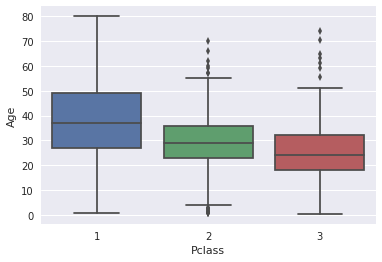

In [25]:
# From exploratory data analysis, we find that age depends on Pclass
sns.boxplot(x='Pclass', y='Age', data=train)